<a href="https://colab.research.google.com/github/i-am-U-hyUn/data-science/blob/main/fruit_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'apple-quality:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4291772%2F7384155%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240205%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240205T215848Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0e378167dd643634de8a546ea5bac7bb7eaaa61aa23a1124f4f5a314fb816b3c3a4869de049bfca7c4f5324febee2a3cd840cc757c6f17d772a2aa9a5c93b7411d6f1474fab7fdc73aad9d51e8c3f6888fdb2a4e687a1a9c50ea456f20b054ef66616803c7588aefe3aa9784e221c072692a438464ca1c036a69cb423a9c90acbfcda7188b1c01dca8de0f0e68d39d24041de06ecac11ac2ad0270115cad8d2dc1dc6b5208885790c428855e08b6604992625f472e419527a547e9782dce091e8be8f5f44594f5b4eb59963226039a889889a9f8bb1364f747e665d96cb2d337b0787b39b02e696373b29e1779d6472c940931d0354090ff72e73d445c295220'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 174361 bytes downloaded
Downloaded and uncompressed: apple-quality
Data source import complete.


![kelsey-todd-ENcI37ufNSM-unsplash.jpg](attachment:1742e569-d358-4969-a13b-66f6509d4b34.jpg)

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
       Description
    </p>
</div>


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
       This dataset contains information about different types of fruits, including their size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality. It appears to be a dataset used for analyzing the quality of various fruits.
    </p>
</div>


Columns :
* index: The index of the dataframe.
* A_id: The ID of the item.
* Size: The size of the item in some unit of measurement.
* Weight: The weight of the item in some unit of measurement.
* Sweetness: The level of sweetness of the item on a scale from very sweet to very sour.
* Crunchiness: The level of crunchiness of the item on a scale from very soft to very crunchy.
* Juiciness: The level of juiciness of the item on a scale from very dry to very juicy.
* Ripeness: The level of ripeness of the item on a scale from unripe to overripe.
* Acidity: The level of acidity of the item on a scale from very low to very high.
* Quality: The overall quality rating of the item, either "good" or "bad".

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      1. Import Libraries
    </p>
</div>


미션 1) 데이터 로드와 피처엔지니어링 🔍📊

데이터셋을 탐색하여 기본적인 통계, 분포, 결측치 등을 확인합니다.
필요에 따라 결측치 처리, 이상치 제거, 데이터 형식 변환 등의 전처리 작업을 수행합니다.
피처 엔지니어링을 통해 데이터의 특성에 맞게 피처를 선택, 생성, 변환합니다. 예를 들어, 범주형 데이터의 경우 One-hot encoding을 적용할 수 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from scipy import stats
# from colorama import Fore, init
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings ('ignore')

sns.set(style="whitegrid")


<div style="background-color:#BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      2. Import Data
    </p>
</div>


In [ ]:
df = pd.read_csv("/kaggle/input/apple-quality/apple_quality.csv")

기술적 통계, 분포, 결측치 확인

In [ ]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
df.describe().T.style.background_gradient(axis=0, cmap='cubehelix')

,count,mean,std,min,25%,50%,75%,max
A_id,4000.000000,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.000000,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.000000,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.000000,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.000000,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.000000,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.000000,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


In [ ]:
df.duplicated().sum()

0

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

A_id: 4001 distinct values
Size: 4001 distinct values
Weight: 4001 distinct values
Sweetness: 4001 distinct values
Crunchiness: 4001 distinct values
Juiciness: 4001 distinct values
Ripeness: 4001 distinct values
Acidity: 4001 distinct values
Quality: 3 distinct values


In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.isnull().any(axis = 1)]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3. Exploration Data
    </p>
</div>


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.1  Clean Data
    </p>
</div>


결측치 처리, 이상치 제거, 데이터 형식 변환

In [ ]:
def clean_data(df):

    df = df.drop(columns=['A_id'])

    df = df.dropna()

    df = df.astype({'Acidity': 'float64'})

    def label(Quality):
        """
        Transform based on the following examples:
        Quality    Output
        "good"  => 0
        "bad"   => 1
        """
        if Quality == "good":
            return 0

        if Quality == "bad":
            return 1

        return None

    df['Label'] = df['Quality'].apply(label)

    df = df.drop(columns=['Quality'])

    df = df.astype({'Label': 'int64'})

    return df

df_clean = clean_data(df.copy())
df_clean.head()


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Label        4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2  Visualization
    </p>
</div>


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2.1  Univariate
    </p>
</div>


feature 분포도 확인

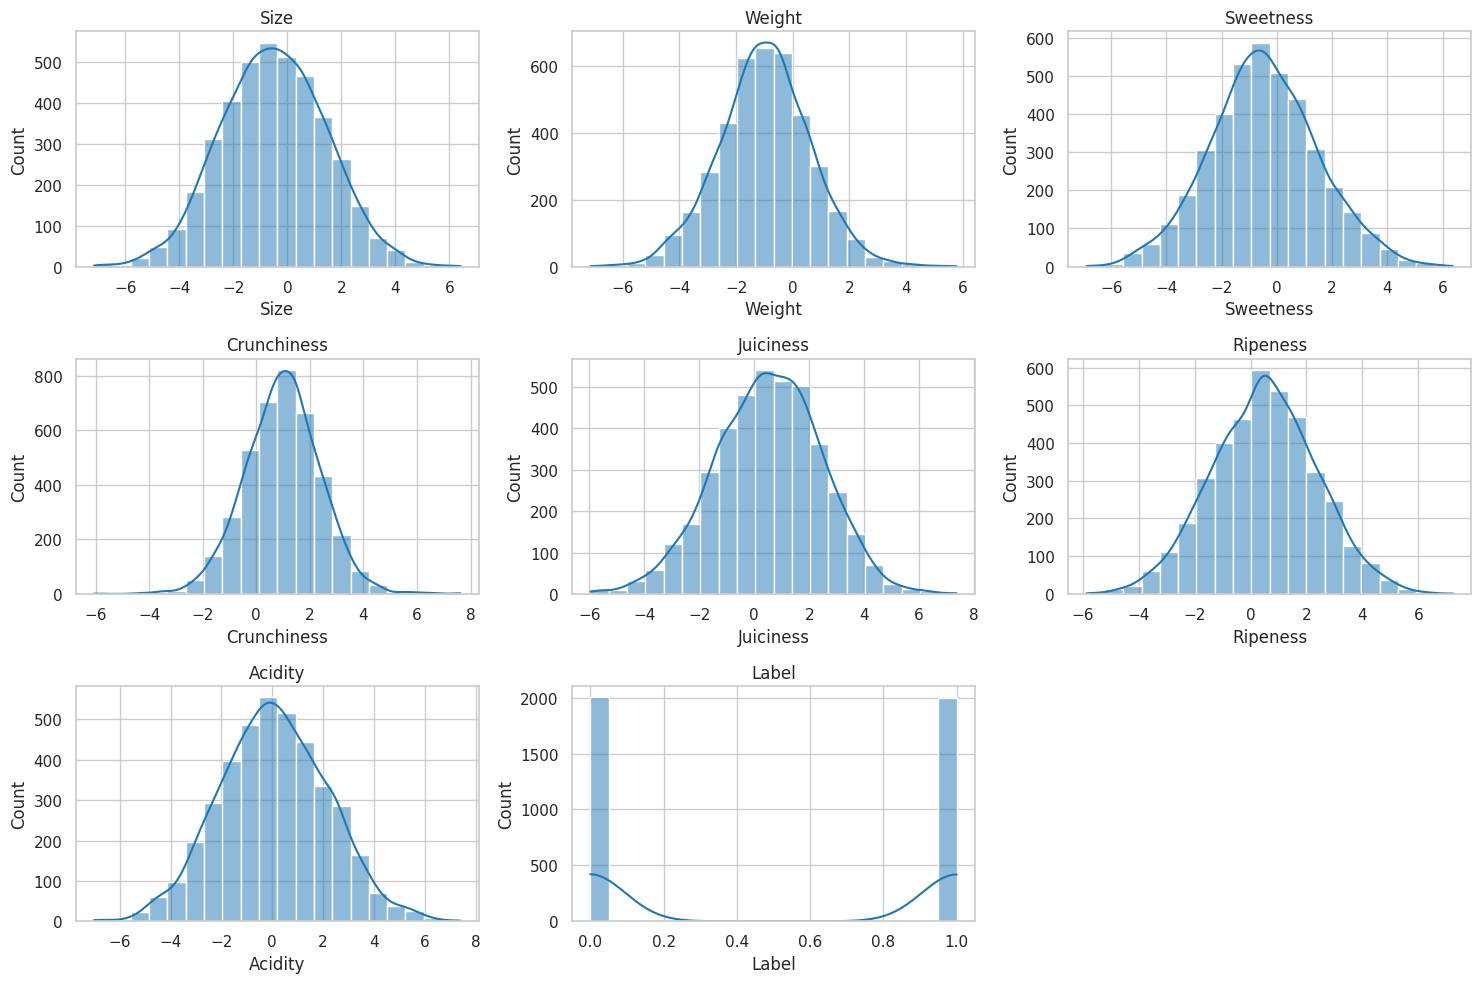

In [ ]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Label']

plt.figure(figsize=(15, 10))
sns.set_palette("tab10")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_clean, x=column, kde=True, bins=20)  # Use sns.histplot for newer versions
    plt.title(column)

plt.tight_layout()
plt.show()


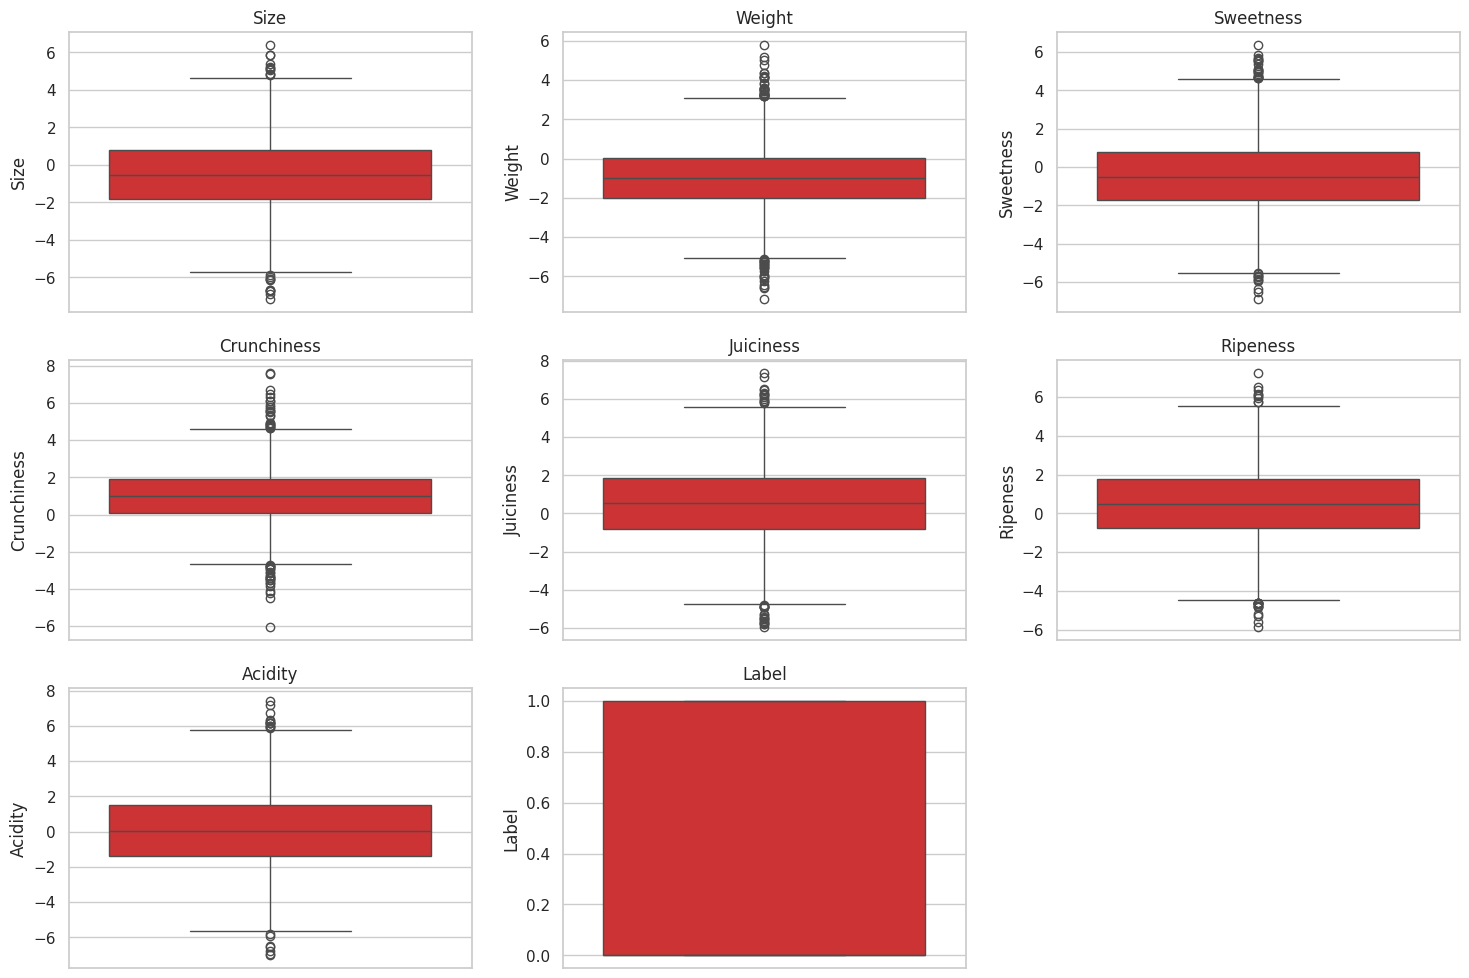

In [ ]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity','Label']

plt.figure(figsize=(15, 10))
sns.set_palette("Set1")
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_clean[column])
    plt.title(column)

plt.tight_layout()
plt.show()


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2.2  Bivariate
    </p>
</div>


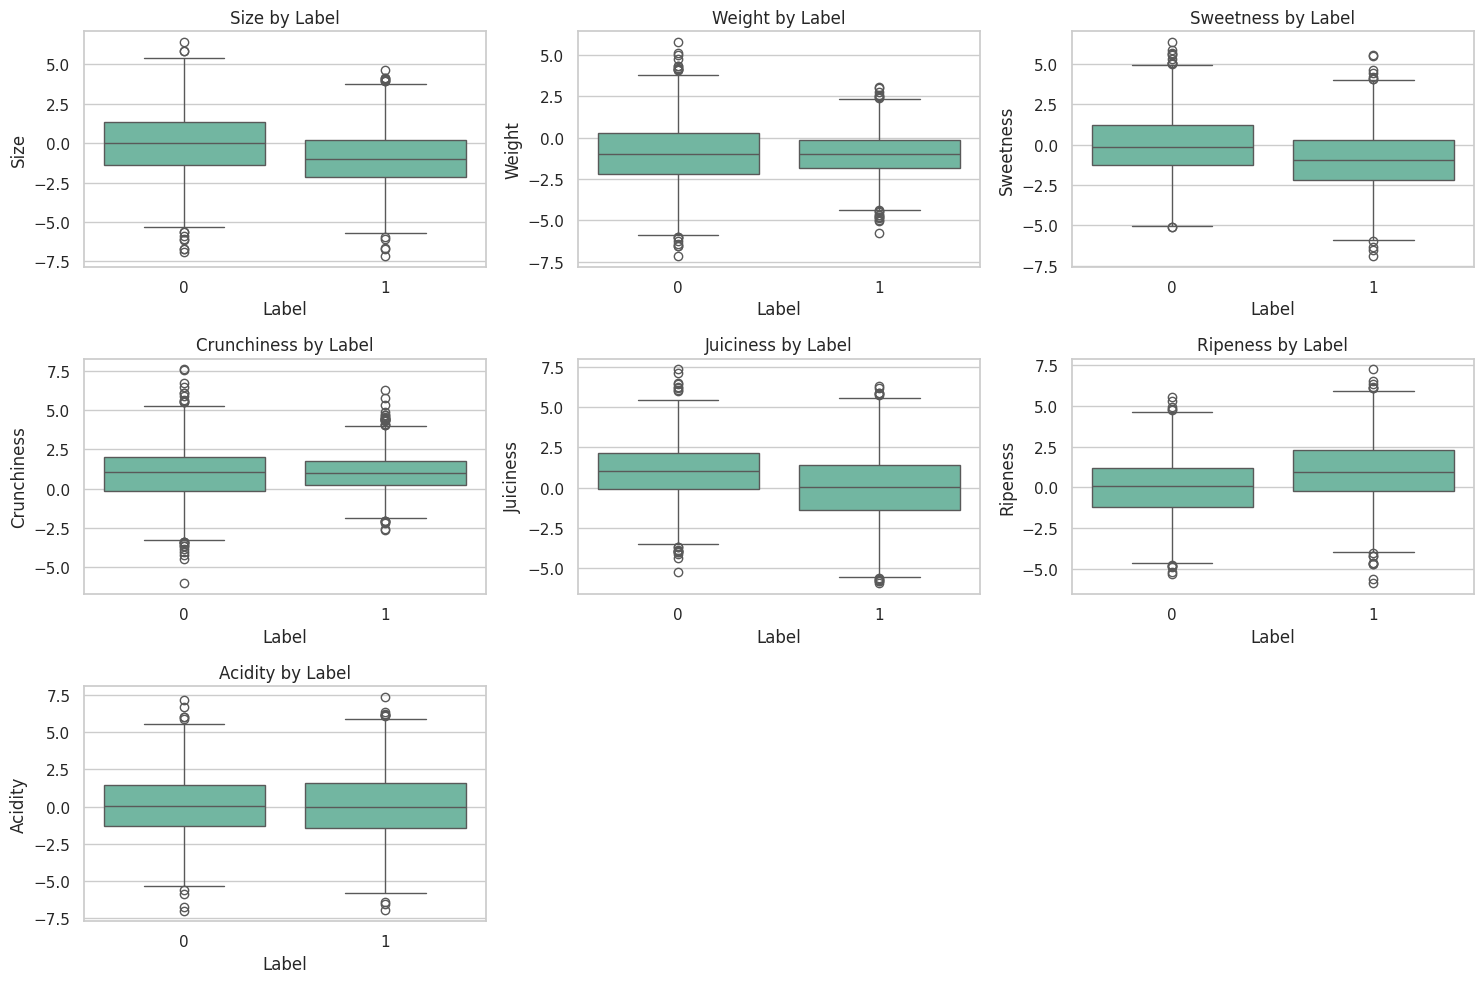

In [ ]:
plt.figure(figsize=(15, 10))
sns.set_palette("Set2")

for i, column in enumerate(df_clean.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Label', y=column, data=df_clean)
    plt.title(f'{column} by Label')

plt.tight_layout()
plt.show()


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2.3  Multivariate
    </p>
</div>


<Figure size 800x800 with 0 Axes>

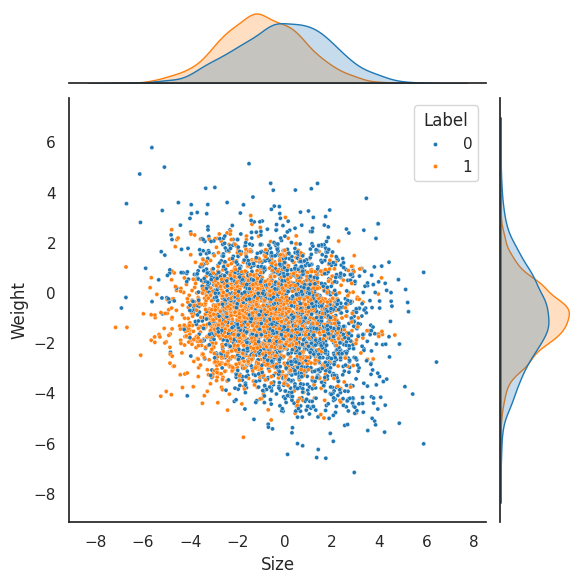

In [ ]:
plt.figure(figsize=(8, 8))
sns.set(style="white")

sns.jointplot(x='Size', y='Weight', hue='Label', data=df_clean, palette='tab10', s=9)

<Figure size 800x800 with 0 Axes>

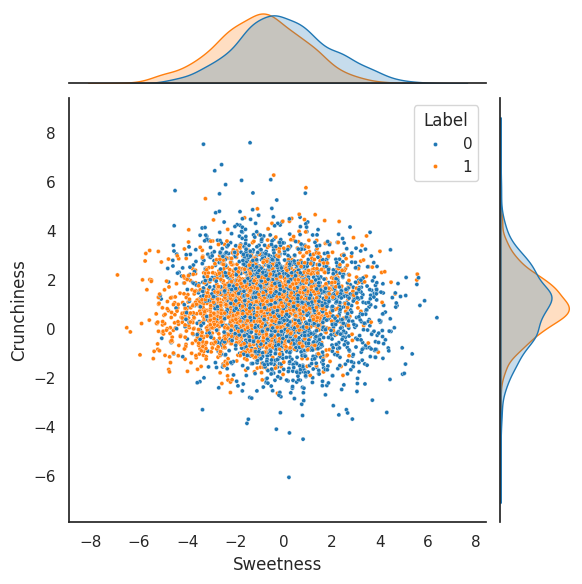

In [ ]:
plt.figure(figsize=(8, 8))
sns.set(style="white")

sns.jointplot(x='Sweetness', y='Crunchiness', hue='Label', data=df_clean, palette='tab10', s=9)

<Figure size 800x800 with 0 Axes>

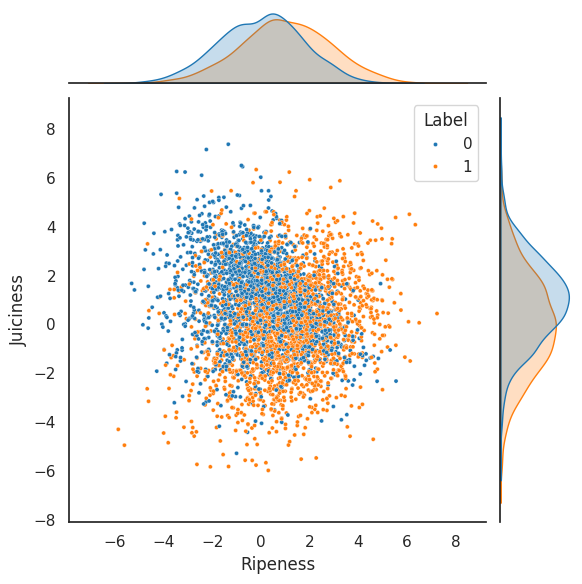

In [ ]:
plt.figure(figsize=(8, 8))
sns.set(style="white")

sns.jointplot(x='Ripeness', y='Juiciness', hue='Label', data=df_clean, palette='tab10', s=9)

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.3  Correlation Heatmap
    </p>
</div>


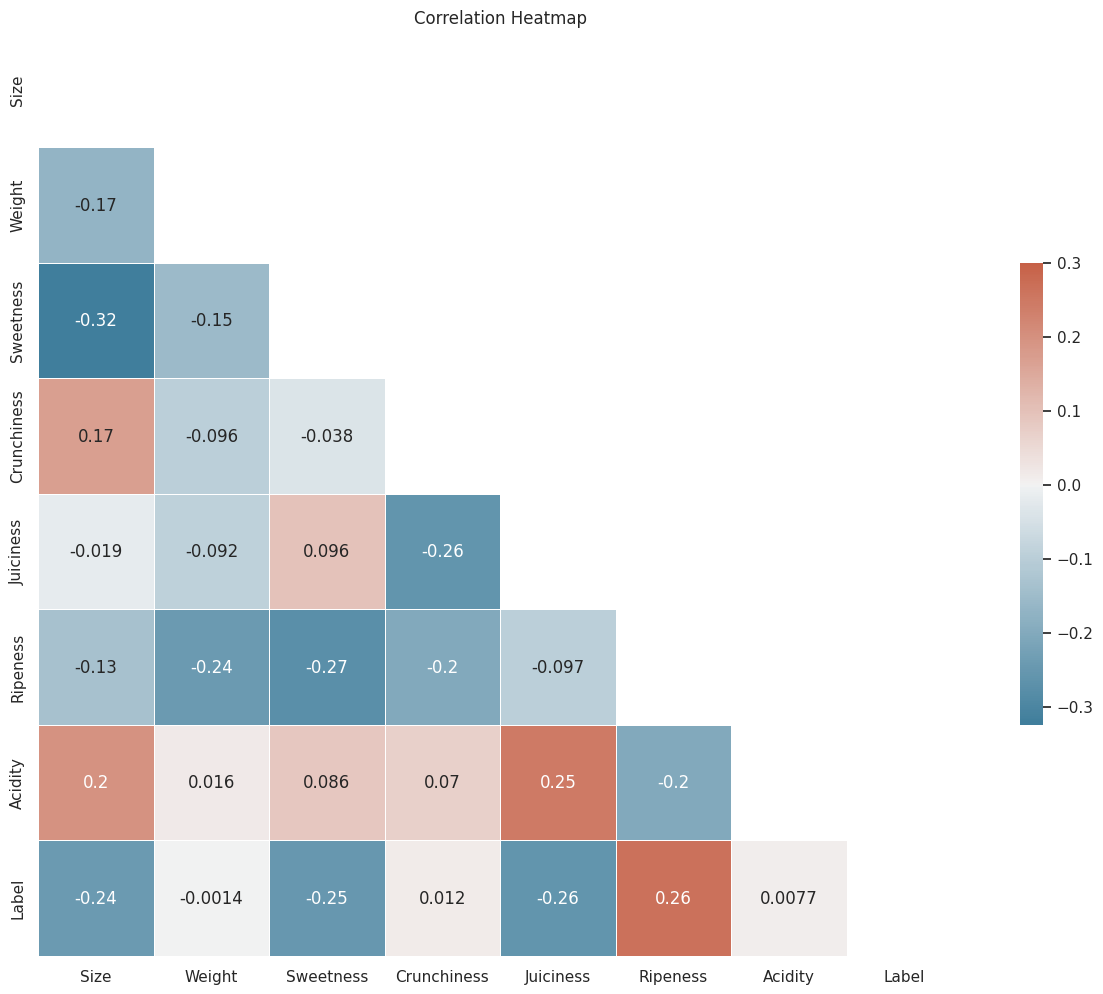

In [ ]:
corr = df_clean.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4. Preprocesing
    </p>
</div>


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4.1  Outliers
    </p>
</div>


In [ ]:
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity']

robust_scaler = RobustScaler()

df_clean[numerical_features] = robust_scaler.fit_transform(df_clean[numerical_features])

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for feature in numerical_features :
    num_outliers = count_outliers(df_clean[feature])
    print(f'Number of outliers in {feature}: {num_outliers}')

Number of outliers in Size: 22
Number of outliers in Weight: 54
Number of outliers in Sweetness: 32
Number of outliers in Crunchiness: 47
Number of outliers in Juiciness: 32
Number of outliers in Ripeness: 24
Number of outliers in Acidity: 20


In [ ]:
scaler = StandardScaler()

df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4.2  Hypothesis Testing
    </p>
</div>


Hypothesis testing is a statistical method used to make decisions based on sample data regarding a proposed claim or hypothesis about a population. In this process, we examine whether the evidence found from the sample is sufficiently strong to support or contradict a statement about a population parameter.

T-statistic: 6.950226687826504e-16
P-value: 0.9999999999999994


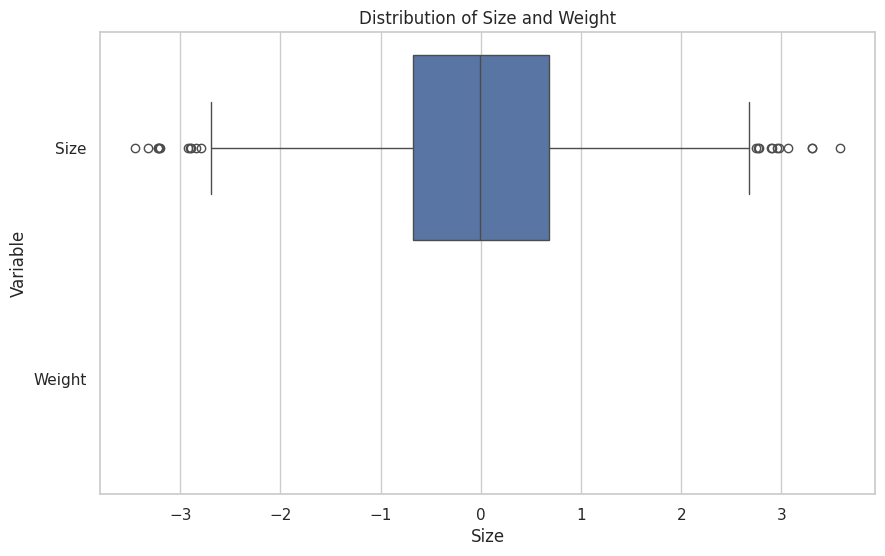

T-statistic: -3.971558107329431e-16
P-value: 0.9999999999999997


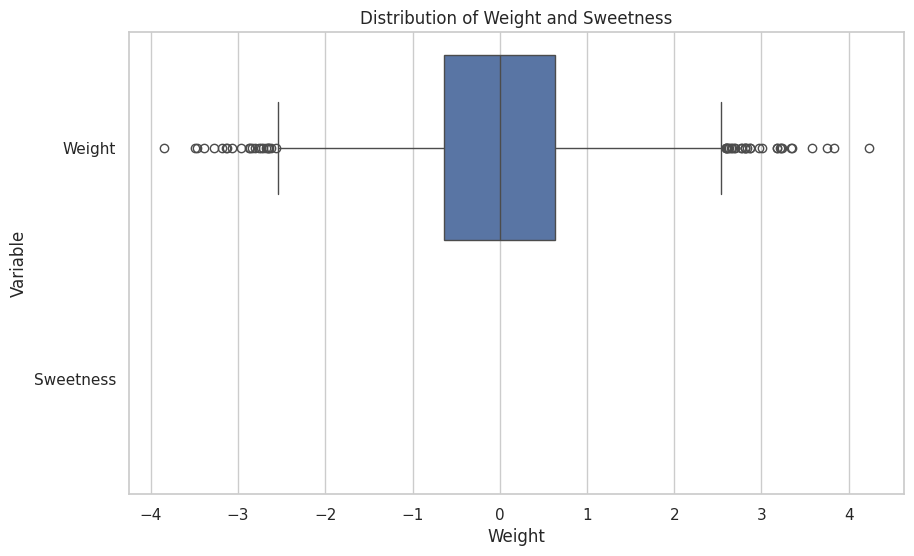

T-statistic: 9.730317362957104e-16
P-value: 0.9999999999999992


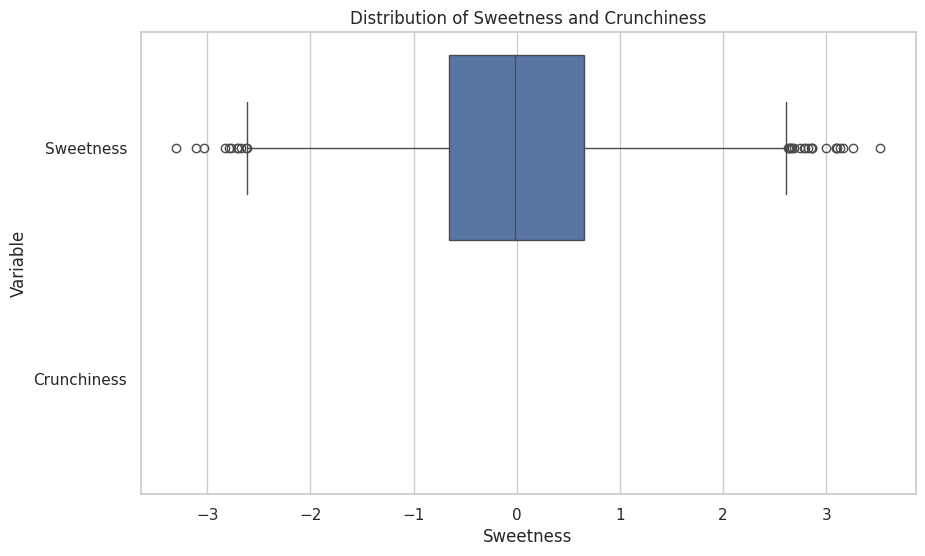

T-statistic: -1.707769986151655e-15
P-value: 0.9999999999999987


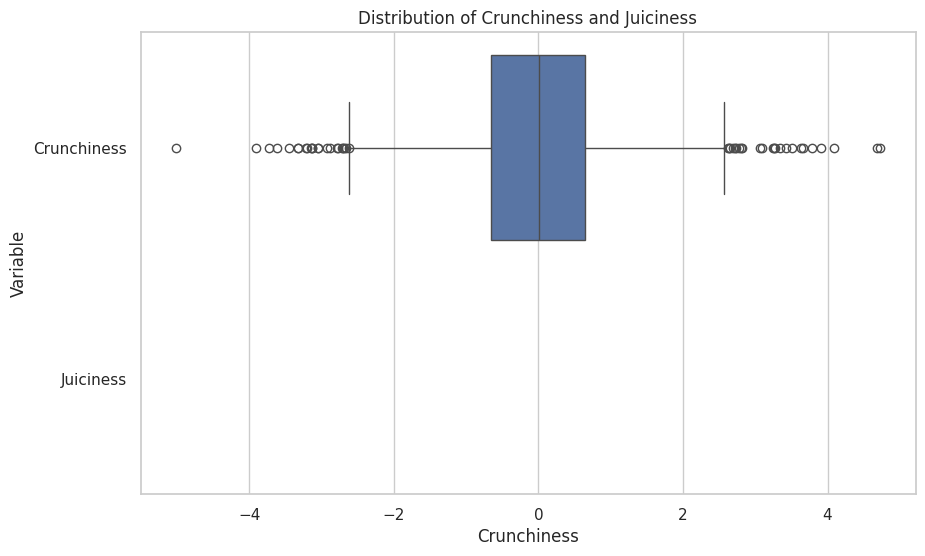

T-statistic: 1.707769986151655e-15
P-value: 0.9999999999999987


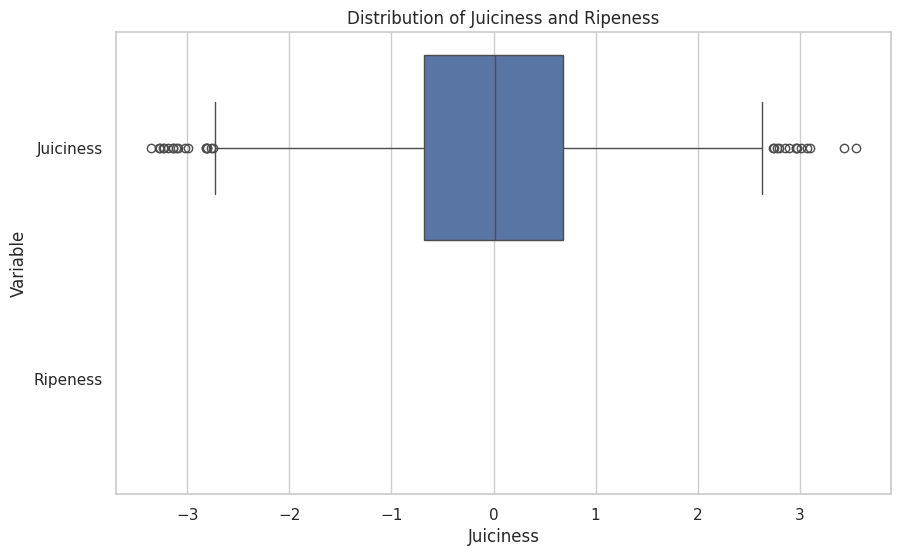

T-statistic: -1.5886232429317723e-16
P-value: 0.9999999999999999


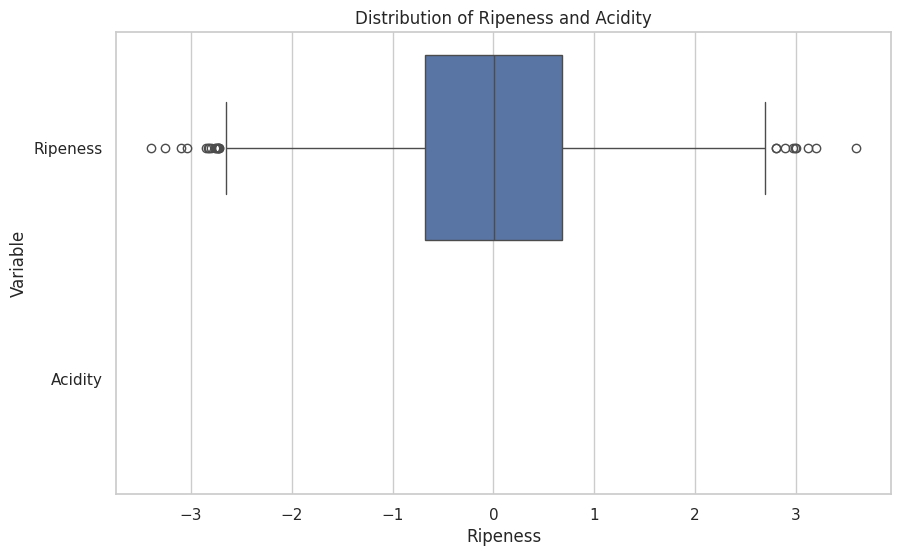

In [ ]:
sns.set(style="whitegrid")


def hypothesis_testing(df, column1, column2):
    t_stat, p_val = stats.ttest_ind(df[column1], df[column2])

    print("T-statistic:", t_stat)
    print("P-value:", p_val)


    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column1], y="Variable", data=pd.melt(df[[column1, column2]], var_name="Variable"))
    plt.title(f'Distribution of {column1} and {column2}')
    plt.show()

columns_for_testing = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

for i in range(len(columns_for_testing) - 1):
    hypothesis_testing(df_clean, columns_for_testing[i], columns_for_testing[i + 1])


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4.3  Imbalance Data
    </p>
</div>


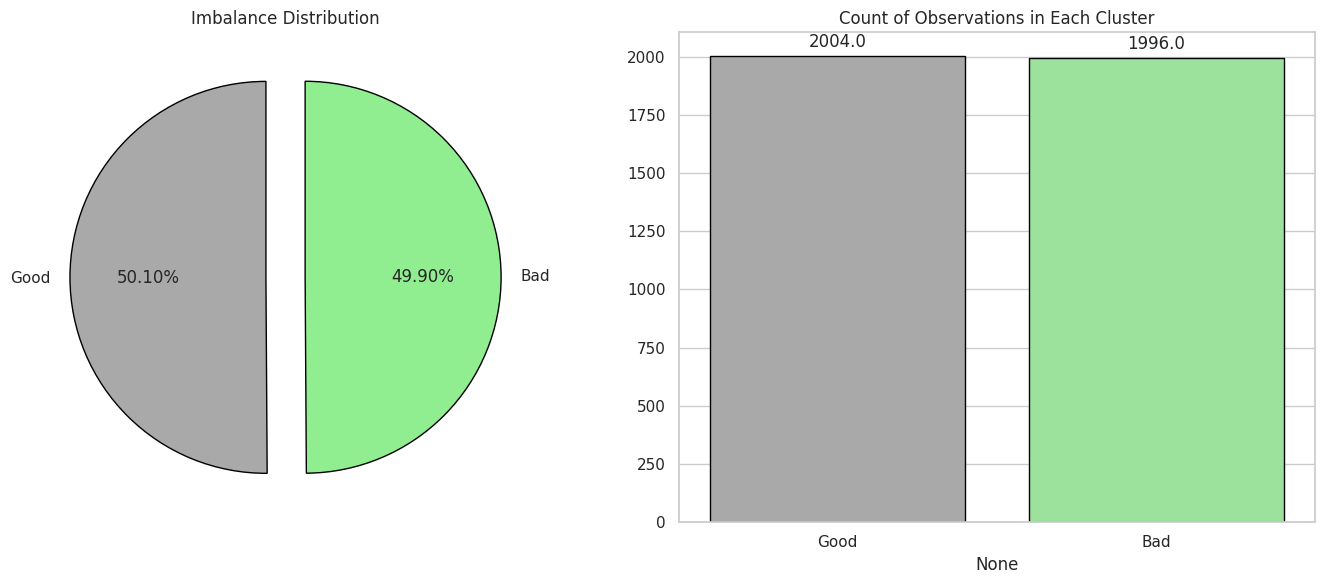

In [ ]:
good_count = df_clean['Label'].eq(0).sum()
bad_count = df_clean['Label'].eq(1).sum()
total_count = len(df_clean)

good_percentage = (good_count / total_count) * 100
bad_percentage = (bad_count / total_count) * 100

label_counts = df_clean['Label'].value_counts()

plt.figure(figsize=(14, 6))

# Subplot 1 - Pie Chart
plt.subplot(1, 2, 1)
pie_values = [good_percentage, bad_percentage]
colors = ['darkgrey', 'lightgreen']
plt.pie(pie_values, labels=['Good', 'Bad'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0.1),
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Imbalance Distribution')

# Subplot 2 - Bar Chart
plt.subplot(1, 2, 2)
colors = ['darkgrey', 'lightgreen']
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors, edgecolor='black')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Good', 'Bad'])
plt.title('Count of Observations in Each Cluster')

plt.tight_layout()
plt.show()


피처 선택, 생성 변환

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4.4  Normalization
    </p>
</div>


In [ ]:
df1 = df_clean.copy()

In [ ]:
X = df1.drop(['Label'], axis=1)
y = df1['Label']


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
X_resampled.describe().T.style.background_gradient(axis=0, cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
Size,4008.000000,0.490431,0.142145,0.000000,0.393548,0.489598,0.586959,1.000000
Weight,4008.000000,0.476027,0.123774,0.000000,0.397052,0.476383,0.554808,1.000000
Sweetness,4008.000000,0.483921,0.146609,0.000000,0.388526,0.481469,0.579613,1.000000
Crunchiness,4008.000000,0.514861,0.102545,0.000000,0.447492,0.515914,0.581305,1.000000
Juiciness,4008.000000,0.485754,0.144913,0.000000,0.387234,0.487180,0.585042,1.000000
Ripeness,4008.000000,0.485673,0.143085,0.000000,0.388877,0.486020,0.582625,1.000000
Acidity,4008.000000,0.491819,0.146420,0.000000,0.390824,0.487914,0.591137,1.000000


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4.5 Split Data
    </p>
</div>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5. Modeling
    </p>
</div>


미션 2) 모델 선택 🧠

분류 문제에 적합한 머신러닝 알고리즘을 선택합니다. 예를 들어, 로지스틱 회귀, 결정 트리, 랜덤 포레스트, 서포트 벡터 머신(SVM), 그라디언트 부스팅 등이 있습니다. 베이스라인 모델 생성하여 성능의 기준점을 설정합니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5.1 SVC
    </p>
</div>


In [ ]:
# 미션 3) 모델 훈련 🤖

# 데이터셋을 훈련 세트와 테스트 세트로 분할합니다. 일반적으로 데이터의 70-80%를 훈련용으로, 나머지를 테스트용으로 사용합니다. 모델에 학습 데이터셋과 정답을 학습시키고 예측 데이터셋으로 예측을 진행합니다.

param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

svc = SVC()

randomized_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

randomized_search.fit(X_train, y_train)


# 미션 4) 하이퍼파라미터 튜닝 ⚙️

# 그리드 서치, 랜덤 서치 등을 활용하여 모델의 하이퍼파라미터를 조정하여 모델의 성능을 최적화합니다. 이 때, 모델의 일반화 성능을 평가하기 위해 교차 검증을 수행합니다.
# (참고) xgboost, lightGBM, catBoost는 하이퍼파라미터 튜닝 기능을 제공합니다.

best_params = randomized_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_svc_model = randomized_search.best_estimator_
svc_predicted = best_svc_model.predict(X_test)

# 미션 5) 모델 평가 및 선택 🎯

# 학습된 모델을 테스트 데이터 또는 새로운 데이터에 적용하여 성능을 평가합니다. 이때 사용할 평가 지표는 태스크에 따라 다를 수 있습니다. 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1-score 등을 고려합니다.
# svc_acc_score = accuracy_score(y_test, svc_predicted)
# svc_conf_matrix = confusion_matrix(y_test, svc_predicted)

print("\nConfusion Matrix:")
print(svc_conf_matrix)
print("\nAccuracy of Support Vector Classifier:", svc_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, svc_predicted))



Best Hyperparameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}

Confusion Matrix:
[[373  39]
 [ 29 361]]

Accuracy of Support Vector Classifier: 91.52119700748129 

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       412
           1       0.90      0.93      0.91       390

    accuracy                           0.92       802
   macro avg       0.92      0.92      0.92       802
weighted avg       0.92      0.92      0.92       802



<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5.2 Random Forest Classifier
    </p>
</div>


In [ ]:
# 미션 3) 모델 훈련 🤖

# 데이터셋을 훈련 세트와 테스트 세트로 분할합니다. 일반적으로 데이터의 70-80%를 훈련용으로, 나머지를 테스트용으로 사용합니다. 모델에 학습 데이터셋과 정답을 학습시키고 예측 데이터셋으로 예측을 진행합니다.

param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

rf = RandomForestClassifier()

randomized_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_rf.fit(X_train, y_train)

# 미션 4) 하이퍼파라미터 튜닝 ⚙️

# 그리드 서치, 랜덤 서치 등을 활용하여 모델의 하이퍼파라미터를 조정하여 모델의 성능을 최적화합니다. 이 때, 모델의 일반화 성능을 평가하기 위해 교차 검증을 수행합니다.
# (참고) xgboost, lightGBM, catBoost는 하이퍼파라미터 튜닝 기능을 제공합니다.

best_params_rf = randomized_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

best_rf_model = randomized_search_rf.best_estimator_

# 미션 5) 모델 평가 및 선택 🎯

# 학습된 모델을 테스트 데이터 또는 새로운 데이터에 적용하여 성능을 평가합니다. 이때 사용할 평가 지표는 태스크에 따라 다를 수 있습니다. 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1-score 등을 고려합니다.
# svc_acc_score = accuracy_score(y_test, svc_predicted)
# svc_conf_matrix = confusion_matrix(y_test, svc_predicted)

rf_predicted = best_rf_model.predict(X_test)

rf_acc_score = accuracy_score(y_test, rf_predicted)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)

print("\nConfusion Matrix for Random Forest:")
print(rf_conf_matrix)
print("\nAccuracy of Random Forest Classifier:", rf_acc_score * 100, '\n')
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predicted))


Best Hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}

Confusion Matrix for Random Forest:
[[367  45]
 [ 43 347]]

Accuracy of Random Forest Classifier: 89.02743142144638 

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       412
           1       0.89      0.89      0.89       390

    accuracy                           0.89       802
   macro avg       0.89      0.89      0.89       802
weighted avg       0.89      0.89      0.89       802



<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5.3 XGB Classifier
    </p>
</div>


In [ ]:
# 미션 3) 모델 훈련 🤖

# 데이터셋을 훈련 세트와 테스트 세트로 분할합니다. 일반적으로 데이터의 70-80%를 훈련용으로, 나머지를 테스트용으로 사용합니다. 모델에 학습 데이터셋과 정답을 학습시키고 예측 데이터셋으로 예측을 진행합니다.

param_dist_xgb = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [1, 1.1, 1.2, 1.3],
}

xgb = XGBClassifier()

randomized_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_xgb.fit(X_train, y_train)


# 미션 4) 하이퍼파라미터 튜닝 ⚙️

# 그리드 서치, 랜덤 서치 등을 활용하여 모델의 하이퍼파라미터를 조정하여 모델의 성능을 최적화합니다. 이 때, 모델의 일반화 성능을 평가하기 위해 교차 검증을 수행합니다.
# (참고) xgboost, lightGBM, catBoost는 하이퍼파라미터 튜닝 기능을 제공합니다.

best_params_xgb = randomized_search_xgb.best_params_
print(f"Best Hyperparameters for XGBoost: {best_params_xgb}")

best_xgb_model = randomized_search_xgb.best_estimator_

# 미션 5) 모델 평가 및 선택 🎯

# 학습된 모델을 테스트 데이터 또는 새로운 데이터에 적용하여 성능을 평가합니다. 이때 사용할 평가 지표는 태스크에 따라 다를 수 있습니다. 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1-score 등을 고려합니다.
# svc_acc_score = accuracy_score(y_test, svc_predicted)
# svc_conf_matrix = confusion_matrix(y_test, svc_predicted)

xgb_predicted = best_xgb_model.predict(X_test)

xgb_acc_score = accuracy_score(y_test, xgb_predicted)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)

print("\nConfusion Matrix for XGBoost:")
print(xgb_conf_matrix)
print("\nAccuracy of XGBoost Classifier:", xgb_acc_score * 100, '\n')
print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_predicted))


Best Hyperparameters for XGBoost: {'subsample': 0.9, 'reg_lambda': 1.3, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}

Confusion Matrix for XGBoost:
[[374  38]
 [ 39 351]]

Accuracy of XGBoost Classifier: 90.3990024937656 

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       412
           1       0.90      0.90      0.90       390

    accuracy                           0.90       802
   macro avg       0.90      0.90      0.90       802
weighted avg       0.90      0.90      0.90       802



<div style="background-color:#BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5.4  KNeighbors Classifier
    </p>
</div>


In [ ]:
# 미션 3) 모델 훈련 🤖

# 데이터셋을 훈련 세트와 테스트 세트로 분할합니다. 일반적으로 데이터의 70-80%를 훈련용으로, 나머지를 테스트용으로 사용합니다. 모델에 학습 데이터셋과 정답을 학습시키고 예측 데이터셋으로 예측을 진행합니다.


param_dist_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2],
}

# 미션 4) 하이퍼파라미터 튜닝 ⚙️

# 그리드 서치, 랜덤 서치 등을 활용하여 모델의 하이퍼파라미터를 조정하여 모델의 성능을 최적화합니다. 이 때, 모델의 일반화 성능을 평가하기 위해 교차 검증을 수행합니다.
# (참고) xgboost, lightGBM, catBoost는 하이퍼파라미터 튜닝 기능을 제공합니다.

knn = KNeighborsClassifier()

randomized_search_knn = RandomizedSearchCV(
    knn,
    param_distributions=param_dist_knn,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_knn.fit(X_train, y_train)

best_params_knn = randomized_search_knn.best_params_
print(f"Best Hyperparameters for KNeighborsClassifier: {best_params_knn}")

best_knn_model = randomized_search_knn.best_estimator_

# 미션 5) 모델 평가 및 선택 🎯

# 학습된 모델을 테스트 데이터 또는 새로운 데이터에 적용하여 성능을 평가합니다. 이때 사용할 평가 지표는 태스크에 따라 다를 수 있습니다. 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1-score 등을 고려합니다.
# svc_acc_score = accuracy_score(y_test, svc_predicted)
# svc_conf_matrix = confusion_matrix(y_test, svc_predicted)

knn_predicted = best_knn_model.predict(X_test)

knn_acc_score = accuracy_score(y_test, knn_predicted)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)

print("\nConfusion Matrix for KNeighborsClassifier:")
print(knn_conf_matrix)
print("\nAccuracy of KNeighborsClassifier:", knn_acc_score * 100, '\n')
print("Classification Report for KNeighborsClassifier:")
print(classification_report(y_test, knn_predicted))


Best Hyperparameters for KNeighborsClassifier: {'weights': 'distance', 'p': 2, 'n_neighbors': 5, 'leaf_size': 30, 'algorithm': 'kd_tree'}

Confusion Matrix for KNeighborsClassifier:
[[365  47]
 [ 42 348]]

Accuracy of KNeighborsClassifier: 88.90274314214463 

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       412
           1       0.88      0.89      0.89       390

    accuracy                           0.89       802
   macro avg       0.89      0.89      0.89       802
weighted avg       0.89      0.89      0.89       802



<div style="background-color:#BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5.5  LGBM Classifier
    </p>
</div>


In [ ]:
# 미션 3) 모델 훈련 🤖

# 데이터셋을 훈련 세트와 테스트 세트로 분할합니다. 일반적으로 데이터의 70-80%를 훈련용으로, 나머지를 테스트용으로 사용합니다. 모델에 학습 데이터셋과 정답을 학습시키고 예측 데이터셋으로 예측을 진행합니다.

param_dist_lgbm = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, -1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# 미션 4) 하이퍼파라미터 튜닝 ⚙️

# 그리드 서치, 랜덤 서치 등을 활용하여 모델의 하이퍼파라미터를 조정하여 모델의 성능을 최적화합니다. 이 때, 모델의 일반화 성능을 평가하기 위해 교차 검증을 수행합니다.
# (참고) xgboost, lightGBM, catBoost는 하이퍼파라미터 튜닝 기능을 제공합니다.

lgbm = LGBMClassifier()

randomized_search_lgbm = RandomizedSearchCV(
    lgbm,
    param_distributions=param_dist_lgbm,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_lgbm.fit(X_train, y_train)

best_params_lgbm = randomized_search_lgbm.best_params_
print(f"Best Hyperparameters for LGBMClassifier: {best_params_lgbm}")

best_lgbm_model = randomized_search_lgbm.best_estimator_

# 미션 5) 모델 평가 및 선택 🎯

# 학습된 모델을 테스트 데이터 또는 새로운 데이터에 적용하여 성능을 평가합니다. 이때 사용할 평가 지표는 태스크에 따라 다를 수 있습니다. 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1-score 등을 고려합니다.
# svc_acc_score = accuracy_score(y_test, svc_predicted)
# svc_conf_matrix = confusion_matrix(y_test, svc_predicted)

lgbm_predicted = best_lgbm_model.predict(X_test)

lgbm_acc_score = accuracy_score(y_test, lgbm_predicted)
lgbm_conf_matrix = confusion_matrix(y_test, lgbm_predicted)

print("\nConfusion Matrix for LGBMClassifier:")
print(lgbm_conf_matrix)
print("\nAccuracy of LGBMClassifier:", lgbm_acc_score * 100, '\n')
print("Classification Report for LGBMClassifier:")
print(classification_report(y_test, lgbm_predicted))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1614, number of negative: 1592
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3206, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503431 -> initscore=0.013724
[LightGBM] [Info] Start training from score 0.013724
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      The Best Model is SVC
    </p>
</div>


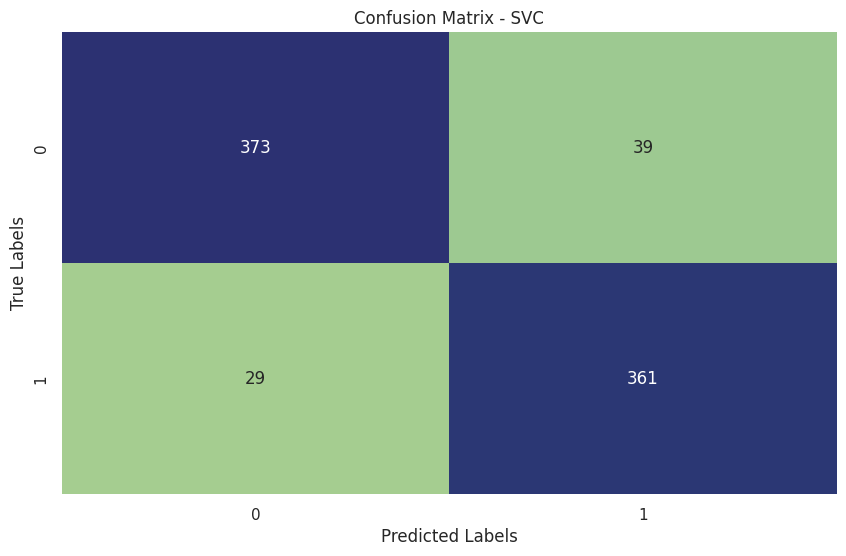


Accuracy of Support Vector Classifier: 91.52119700748129 



In [ ]:
conf_matrix = confusion_matrix(y_test, svc_predicted)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nAccuracy of Support Vector Classifier:", svc_acc_score * 100, '\n')

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      6.Receiver Operator Characteristic (ROC)
    </p>
</div>


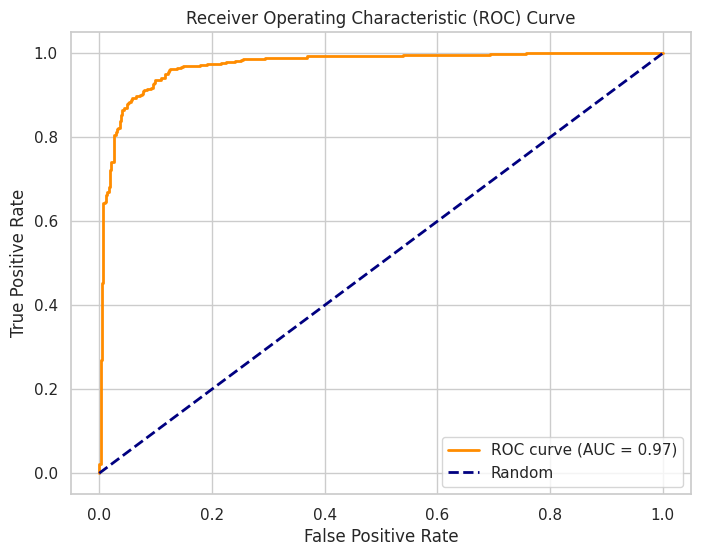

In [ ]:
y_prob = best_svc_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

* 0.90 - 1.00 = ****excellent****
* 0.80 - 0.90 = ****good****
* 0.70 - 0.80 = ****fair****
* 0.60 - 0.70 = ****poor****
* 0.50 - 0.60 = ****fail****

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      7.Finish
    </p>
</div>


## ****Please Upvote if you Like it.****

![360_F_291522205_XkrmS421FjSGTMRdTrqFZPxDY19VxpmL.jpg](attachment:c051f20b-aeb2-47b3-89d3-469e061a4f3f.jpg)